In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np 
import datetime as dt

# packages for unsupervised learning
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#storing the path
file = './Earth_Challenge_Integrated_2015-2018.csv'

# reading the file into Python
plastic_pol_original = pd.read_csv(file)


plastic_pol = plastic_pol_original

# outputting the first ten rows of the dataset
plastic_pol.head(n = 5)

/Users/arjunmanohar/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,21,22,23,24,34,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,X,Y,OBJECTID,RecordSequenceID,UniqueID,SourceID,LocationFreqID,Location,Dataset,Organization,Other,CountryName_FromSource,SubCountry_L1_FromSource,SubCountry_L2_FromSource,Longitude1,Latitude1,Longitude2,Latitude2,TotalWidth_m,TotalLength_m,TotalArea_Sq_m,ShorelineName,WaterfrontName,BeachAreaLandcover,BeachType,EventType,TotalVolunteers,DateOriginal,DateStandardized,MonthYear,Year,MonthNum,Month,Day,StartTime,DOW,FieldObsevations,DebrisDescription,Totalltems_EventRecord,TotalClassifiedItems_EC2020,PCT_PlasticAndFoam,PCT_Glass_Rubber_Lumber_Metal,SUM_Hard_PlasticBeverageBottle,SUM_Hard_OtherPlasticBottle,SUM_HardOrSoft_PlasticBottleCap,SUM_PlasticOrFoamFoodContainer,SUM_Hard_BucketOrCrate,SUM_Hard_Lighter,SUM_OtherHardPlastic,SUM_PlasticOrFoamPlatesBowlsCup,SUM_HardSoft_PersonalCareProduc,SUM_HardSoftLollipopStick_EarBu,SUM_Soft_Bag,SUM_Soft_WrapperOrLabel,SUM_Soft_Straw,SUM_Soft_OtherPlastic,SUM_Soft_CigaretteButts,SUM_Soft_StringRingRibbon,Fishing_Net,SUM_FishingLineLureRope,Fishing_BuoysAndFloats,SUM_Foam_OtherPlasticDebris,SUM_OtherPlasticDebris,NAME,COUNTRY,ISO_CODE,ISO_CC,ISO_SUB,ADMINTYPE,DISPUTED,NOTES,AUTONOMOUS,COUNTRYAFF,CONTINENT,LAND_TYPE,LAND_RANK,Shape__Area,Shape__Length,Count_,Soft_Sheets2,PlasticStraps2,FishingGlowSticks2,FishingOtherPlasticDebris2
0,-123.435585,38.690549,1,349,MDP-349,40-3153,Blackpoint Beach (Lon -123.4355847 Lat 38.6905...,"Blackpoint Beach, Sonoma, CA, United States",NOAA MDMAP Accumulation Survey,California Coast National Monument Task Force,NaN,United States,CA,Sonoma,-123.435585,38.690549,-123.432939,38.689234,11.887,898.0,NaN,Blackpoint Beach,NaN,NaN,NaN,Marine Debris Accumulation Survey,3.0,2015/01/04 00:00:00+00,2015/01/04 00:00:00+00,Jan-2015,2015,1,Jan,4,4:10 PM,Sunday,NaN,"On other: 1 plastic wine cork, 1 plastic child...",28,24,85.7,14.3,1,0,1,0.0,0,0.0,4,0,0,0,1,1,0.0,1,0.0,0,1,0,0,13,1.0,California,United States,USCA,US,CA,State,0.0,,0.0,United States,North America,Primary land,5.0,41.506355,56.814460,1,0,0,0,0
1,-123.484406,38.728707,2,351,MDP-351,37-3164,Dune Drift Beach (Lon -123.4844062 Lat 38.7287...,"Dune Drift Beach, Sonoma, CA, United States",NOAA MDMAP Accumulation Survey,California Coast National Monument Task Force,NaN,United States,CA,Sonoma,-123.484406,38.728707,-123.487692,38.733347,10.000,190.5,NaN,Dune Drift Beach,NaN,NaN,NaN,Marine Debris Accumulation Survey,1.0,2015/01/10 00:00:00+00,2015/01/10 00:00:00+00,Jan-2015,2015,1,Jan,10,10:00 AM,Saturday,NaN,NaN,19,17,89.5,10.5,0,0,1,0.0,0,0.0,4,0,1,0,0,0,0.0,2,0.0,0,0,0,0,9,0.0,California,United States,USCA,US,CA,State,0.0,,0.0,United States,North America,Primary land,5.0,41.506355,56.814460,1,0,0,0,0
2,-123.456400,38.713200,3,354,MDP-354,59-3175,Ohlson Beach (Lon -123.4564 Lat 38.7132),"Ohlson Beach, Sonoma, CA, United States",NOAA MDMAP Accumulation Survey,California Coast National Monument Task Force,NaN,United States,CA,Sonoma,-123.456400,38.713200,-123.455100,38.710600,65.000,309.0,NaN,Ohlson Beach,NaN,NaN,NaN,Marine Debris Accumulation Survey,1.0,2015/01/14 00:00:00+00,2015/01/14 00:00:00+00,Jan-2015,2015,1,Jan,14,11:30 AM,Wednesday,NaN,NaN,0,0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,California,United States,USCA,US,CA,State,0.0,,0.0,United States,North America,Primary land,5.0,41.506355,56.814460,1,0,0,0,0
3,-123.490915,38.735105,4,358,MDP-358,41-3191,Walk On Beach (Lon -123.490915 Lat 38.735105),"Walk On Beach, Sonoma, CA, United States",NOAA MDMAP Accumulation Survey,California Coast National Monument Task Force,NaN,United States,CA,Sonoma,-123.490915,38.735105,-123.489614,38.731897,56.000,300.0,NaN,Walk On Beach,NaN,NaN,NaN,Marine Debris Accumulation Survey,1.0,2015/01/15 00:00:00+00,2015/01/15 00:00:00+00,Jan-2015,2015,1,Jan,15,2:00 PM,Thursday,Clean Beach!,NaN,11,8,72.7,27.3,0,0,0,0.0,0,1.0,5,0,0,0,1,1,0.0,0,0.0,0,0,0,0,0,0.0,California,United States,USCA,US,CA,State,0.0,,0.0,United States,North America,Primary land,5.0,41.506355,56.814460,1,0,0,0,0
4,-124.462100,42.714900,5,360,MDP-

In [2]:
# Checking the data types 
# plastic_pol.info(verbose = True)

# Checking for NULL values
plastic_pol.isna().sum(axis = 0)

X                                      0
Y                                      0
OBJECTID                               0
RecordSequenceID                       0
UniqueID                               0
SourceID                            2418
LocationFreqID                         0
Location                            3246
Dataset                                0
Organization                       10800
Other                              54388
CountryName_FromSource              3976
SubCountry_L1_FromSource            6097
SubCountry_L2_FromSource            5664
Longitude1                             0
Latitude1                              0
Longitude2                         49849
Latitude2                          49849
TotalWidth_m                       52267
TotalLength_m                          0
TotalArea_Sq_m                     54388
ShorelineName                      49849
WaterfrontName                     53082
BeachAreaLandcover                 53278
BeachType       

In [3]:
# filling NANs
plastic_pol['ISO_CODE'].fillna(value="unknown", inplace=True)
plastic_pol['COUNTRY'].fillna(value="unknown", inplace=True)
plastic_pol['CONTINENT'].fillna(value="Missing_data", inplace=True)

# verifying
# plastic_pol.isna().sum(axis = 0)

In [4]:
# adding the plastic waste together
plastic_pol["SUM_plastic_waste"] = plastic_pol.loc[:, plastic_pol.columns.str.match('^SUM')].sum(axis=1)

# checking the new column
plastic_pol["SUM_plastic_waste"]

0         23.0
1         17.0
2          0.0
3          8.0
4        892.0
         ...  
54383     35.0
54384     36.0
54385    965.0
54386    125.0
54387    195.0
Name: SUM_plastic_waste, Length: 54388, dtype: float64

In [5]:
# analysing the key metrics
plastic_pol.loc[:,["Totalltems_EventRecord", "TotalClassifiedItems_EC2020", "SUM_plastic_waste"]].describe().round(2)

# every line is a record of littering 

,Totalltems_EventRecord,TotalClassifiedItems_EC2020,SUM_plastic_waste
count,54388.00,54388.00,54388.00
mean,2551.89,2353.32,2338.99
std,139408.60,134707.87,134687.33
min,0.00,0.00,0.00
25%,22.00,17.00,16.00
50%,132.00,106.00,104.00
75%,607.00,502.00,491.00
max,27386329.00,26420613.00,26418958.00


(array([5.4351e+04, 1.6000e+01, 4.0000e+00, 1.0000e+00, 3.0000e+00,
        3.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

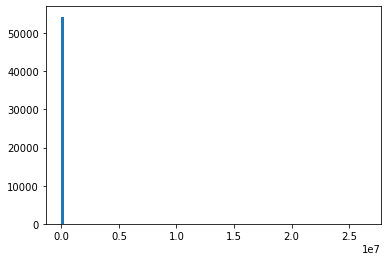

In [ ]:
# checking the distribution
plt.hist(plastic_pol["TotalClassifiedItems_EC2020"], bins=100)

(array([5.4381e+04, 3.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([       0. ,  2641895.8,  5283791.6,  7925687.4, 10567583.2,
        13209479. , 15851374.8, 18493270.6, 21135166.4, 23777062.2,
        26418958. ]),
 <BarContainer object of 10 artists>)

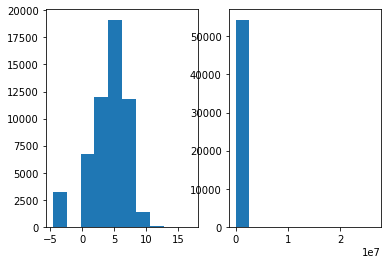

In [ ]:
# analysing the distribution
plastic_pol["lg_SUM_plastic_waste"] = np.log(plastic_pol["SUM_plastic_waste"] + 0.01)

plt.subplot(1, 2, 1)
plt.hist(plastic_pol["lg_SUM_plastic_waste"])

plt.subplot(1, 2, 2)
plt.hist(plastic_pol["SUM_plastic_waste"])

In [14]:
# checking the no. of obs
plastic_pol[plastic_pol["SUM_plastic_waste"] > 1000000].shape

(17, 84)

<h2> Data Preprocessing - Plastic Pollution Data </h2>

In [7]:
plastic_pol["Year"].value_counts()

2018    24785
2017    16529
2016    11141
2015     1933
Name: Year, dtype: int64

In [66]:
plastic_data = plastic_pol.loc[:,["DateStandardized", "Totalltems_EventRecord", "TotalClassifiedItems_EC2020", "PCT_PlasticAndFoam", "PCT_Glass_Rubber_Lumber_Metal"]]
plastic_data["Dates"] = pd.to_datetime(plastic_data["DateStandardized"]).dt.date
plastic_data["Dates"] = pd.to_datetime(plastic_data["Dates"])
plastic_data.index = pd.to_datetime(plastic_data["Dates"])
plastic_data.head()
plastic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54388 entries, 2015-01-04 to 2015-09-19
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DateStandardized               54388 non-null  object        
 1   Totalltems_EventRecord         54388 non-null  int64         
 2   TotalClassifiedItems_EC2020    54388 non-null  int64         
 3   PCT_PlasticAndFoam             54388 non-null  float64       
 4   PCT_Glass_Rubber_Lumber_Metal  54388 non-null  float64       
 5   Dates                          54388 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.9+ MB


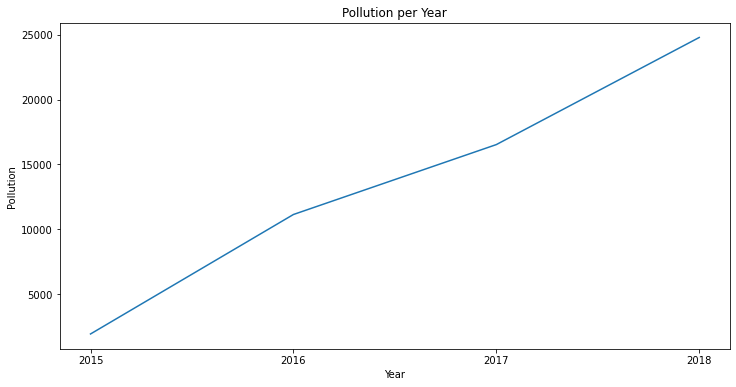

In [67]:
# plotting pollution per year
plt.figure(figsize=(12,6))

yearly_pollution = plastic_data["Dates"].resample("Y").count()
years = [x for x in range(2015, 2019)]
sns.lineplot(x=years, y=yearly_pollution.values)
plt.xlabel("Year")
plt.ylabel("Pollution")
plt.xticks(years, years)
plt.title("Pollution per Year")
plt.show()

In [70]:
# calculating YoY change
yearly_summary = plastic_data[["Dates", "TotalClassifiedItems_EC2020"]]
yearly_summary.head()

,Dates,TotalClassifiedItems_EC2020
Dates,,
2015-01-04,2015-01-04,24
2015-01-10,2015-01-10,17
2015-01-14,2015-01-14,0
2015-01-15,2015-01-15,8
2015-01-15,2015-01-15,893


In [73]:
yearly_summary['Year'] = yearly_summary['Dates'].dt.year
yearly_summary = yearly_summary.groupby('Year')['TotalClassifiedItems_EC2020'].mean()
yearly_summary = yearly_summary.reset_index()
yearly_summary.head()

/var/folders/qs/nzqqpg0933g6kxnnnrs4ycx40000gn/T/ipykernel_95519/1879151921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_summary['Year'] = yearly_summary['Dates'].dt.year


,Year,TotalClassifiedItems_EC2020
0,2015,217.353337
1,2016,1104.623104
2,2017,1171.320346
3,2018,3869.471858


In [77]:
yearly_summary['difference'] = yearly_summary['TotalClassifiedItems_EC2020'].diff(1)
yearly_summary['YoY%'] = round(yearly_summary['difference']/yearly_summary['TotalClassifiedItems_EC2020']*100,2)
yearly_summary

,Year,TotalClassifiedItems_EC2020,difference,YoY%
0,2015,217.353337,NaN,NaN
1,2016,1104.623104,887.269767,80.32
2,2017,1171.320346,66.697242,5.69
3,2018,3869.471858,2698.151512,69.73


Insights: 
Since the data is crowded sourced, gaps within the dataset is to be expected. But nevertheless we are seeing a sharp increase (69%) in pollution going into 2018. 


<h3> Plotting GEO data using Plotly</h3>

In [ ]:
# Plotting the GIS Data using Plotly
import plotly.express as px
import pandas as pd

# df = plastic_pol.loc[:,:][plastic_pol["CONTINENT"] == "North America"]

# fig = px.scatter_geo(df,lat='Latitude1',lon='Longitude1', size="SUM_plastic_waste", hover_name="Location")
# fig.update_layout(title = 'North America', title_x=0.5, geo_scope="usa")
# # fig.show()

Insights:

Proportion of plastic waste (mismanaged or littered) is higher on the east coast than west coast of N.A. 


In [ ]:
# GIS Data - Mapped - Worldwide

fig = px.scatter_geo(plastic_pol,lat='Latitude1',lon='Longitude1',color="lg_SUM_plastic_waste")
fig.update_layout(title = 'Proportion of mismanaged or littered plastic waste worldwide', title_x=0.5)
fig.show()

Insights:

Asia and Africa stands out - Therefore: emerging/ developing/ Low income countries have a waste mismanaged waste problem.

Trend: Countries that are either developing or emerging economies are more likely to mismanage their waste. [ASIA & AFRICA]

Research: 
Also, our research revealed that not all the waste in ASIA are generated in ASIA. Most the waste accepted in this region are from the west as these countries prefer to export these waste then recycle them. 


<h2> Plastic Pollution Macroeconomics </h2>

Link to Dataset: [Data](https://ourworldindata.org/)<br>

The main article: [Plastic Pollution](https://ourworldindata.org/plastic-pollution). Created by Hannah Ritchie and Max Roser (2018) - "Plastic Pollution". Published online at OurWorldInData.org. Retrieved from: [Online Resource](https://ourworldindata.org/plastic-pollution) 

Scope of the study:<br>
    <ul> <li>Data collected between 1980 to 2019  </li><br>
    <li>Understand the total waste produced by each country and the total waste mismanaged by the countries </li><br>
    <li>Check the relation between waste and the GDP per capita for each nation</li></ul><br>

In [82]:
# storing the path
file = './per-capita-plastic-waste-vs-gdp-per-capita.csv'

# reading the file into Python
plastic_gdp = pd.read_csv(file)

# outputting the first ten rows of the dataset
plastic_gdp.head(n = 5)

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN
2,Afghanistan,AFG,2003,NaN,1235.810063,23680871.0,NaN
3,Afghanistan,AFG,2004,NaN,1200.278013,24726689.0,NaN
4,Afghanistan,AFG,2005,NaN,1286.793659,25654274.0,NaN


In [83]:
# renaming the columns 
plastic_gdp.rename(columns={'GDP per capita, PPP (constant 2017 international $)': 'GDP per capita in PPP', 
                   'Population (historical estimates)': 'Total Population',
                    'Per capita plastic waste (kg/person/day)': 'Waste per person(kg/day)'}, inplace=True)


plastic_gdp.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN
2,Afghanistan,AFG,2003,NaN,1235.810063,23680871.0,NaN
3,Afghanistan,AFG,2004,NaN,1200.278013,24726689.0,NaN
4,Afghanistan,AFG,2005,NaN,1286.793659,25654274.0,NaN


In [84]:
# removing entities/countries with incomplete/missing data
incomplete_data_index = plastic_gdp[(plastic_gdp['Total Population'].isna()) & (plastic_gdp['GDP per capita in PPP'].isna())].index
plastic_gdp.drop(incomplete_data_index, inplace=True)
plastic_gdp = plastic_gdp.drop(columns='Continent')

In [85]:
# dropping rows with missing per person waste generation values
plastic_gdp = plastic_gdp[plastic_gdp['Waste per person(kg/day)'].notna()]
waste_generated = plastic_gdp.reset_index().drop('index', axis=1)

In [86]:
# loading the mismanaged dataset
plastic_mismanaged = pd.read_csv('./per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')
plastic_mismanaged.head()

# plastic_mismanaged.isna().sum(axis = 0)

,Entity,Code,Year,Mismanaged plastic waste per capita (kg per year),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN
2,Afghanistan,AFG,2003,NaN,1235.810063,23680871.0,NaN
3,Afghanistan,AFG,2004,NaN,1200.278013,24726689.0,NaN
4,Afghanistan,AFG,2005,NaN,1286.793659,25654274.0,NaN


In [87]:
plastic_mismanaged.rename(columns={'Mismanaged plastic waste per capita (kg per year)': 'Mismanaged waste per person(kg/day)',
                     'GDP per capita, PPP (constant 2017 international $)': 'GDP per capita in PPP',
                     'Population (historical estimates)': 'Total Population'}, inplace=True)

plastic_mismanaged.head()

# plastic_mismanaged.drop('Continent', axis=1, inplace=True)
# plastic_mismanaged["Mismanaged waste per person(kg/day)"].sum()


,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN
2,Afghanistan,AFG,2003,NaN,1235.810063,23680871.0,NaN
3,Afghanistan,AFG,2004,NaN,1200.278013,24726689.0,NaN
4,Afghanistan,AFG,2005,NaN,1286.793659,25654274.0,NaN


In [88]:
# new dataframe for the required data
data2 = plastic_mismanaged

# dropping rows with missing mismanaged waste values
data2 = data2[data2['Mismanaged waste per person(kg/day)'].isna() != True]
waste_mismanged = data2.reset_index().drop('index', axis=1)

# reviewing the dataset
waste_mismanged.head(n=5)

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Africa,NaN,2019,10.465928,NaN,1.308064e+09,NaN
1,Albania,ALB,2019,24.239153,13671.488422,2.880913e+06,NaN
2,Algeria,DZA,2019,17.758995,11510.557088,4.305305e+07,NaN
3,Angola,AGO,2019,7.445279,6670.331458,3.182530e+07,NaN
4,Antigua and Barbuda,ATG,2019,6.463918,21548.725008,9.711500e+04,NaN


In [89]:
# joining both the dataframes
plastic_waste = pd.merge(waste_generated, waste_mismanged, on="Entity")

plastic_waste["GDP per capita in PPP"] = plastic_waste["GDP per capita in PPP_x"] + plastic_waste["GDP per capita in PPP_y"]
plastic_waste["Total Population"] = plastic_waste["Total Population_x"] + plastic_waste["Total Population_y"]

# reviewing the merged dataset
plastic_waste.head()

,Entity,Code_x,Year_x,Waste per person(kg/day),GDP per capita in PPP_x,Total Population_x,Code_y,Year_y,Mismanaged waste per person(kg/day),GDP per capita in PPP_y,Total Population_y,Continent,GDP per capita in PPP,Total Population
0,Albania,ALB,2010,0.069,10749.487448,2948029.0,ALB,2019,24.239153,13671.488422,2880913.0,NaN,24420.975870,5828942.0
1,Algeria,DZA,2010,0.144,10970.706369,35977451.0,DZA,2019,17.758995,11510.557088,43053054.0,NaN,22481.263457,79030505.0
2,Angola,AGO,2010,0.062,7692.434286,23356247.0,AGO,2019,7.445279,6670.331458,31825299.0,NaN,14362.765745,55181546.0
3,Antigua and Barbuda,ATG,2010,0.660,18205.738533,88030.0,ATG,2019,6.463918,21548.725008,97115.0,NaN,39754.463541,185145.0
4,Argentina,ARG,2010,0.183,23521.270175,40895751.0,ARG,2019,10.401912,22063.904372,44780675.0,NaN,45585.174547,85676426.0


In [90]:
# rearranging columns in the dataframe
plastic_waste.columns.tolist()
col_list = ['Entity','Code_x','Year_x','Waste per person(kg/day)','Mismanaged waste per person(kg/day)',
           'GDP per capita in PPP','Total Population','Continent']
plastic_waste = plastic_waste[col_list]

# rounding the values per person
plastic_waste.iloc[:, 3:5] = np.around(plastic_waste[['Waste per person(kg/day)', 
                                                      'Mismanaged waste per person(kg/day)']], decimals=2)

# changing datatype
plastic_waste['Total Population'] = plastic_waste['Total Population'].astype(int)

Calculating Total waste and Total mismanaged waste by country<br>

<ul><li>Total waste equals product of waste generated per person per day and the total population of that country, multiplied by 365 for a year.</li><br>

<li>Total mismanaged waste equals product of mismanaged waste per person a day and the total population of that country, multiplied by 365 for a year.</li></ul><br>


In [91]:
plastic_waste['Total waste(kgs/year)'] = ((plastic_waste['Waste per person(kg/day)'] * 
                                    plastic_waste['Total Population']) * 365)
plastic_waste['Total waste mismanaged(kgs/year)'] = ((plastic_waste['Mismanaged waste per person(kg/day)'] * 
                                    plastic_waste['Total Population']) * 365)


plastic_waste.head()

,Entity,Code_x,Year_x,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Total waste(kgs/year),Total waste mismanaged(kgs/year)
0,Albania,ALB,2010,0.07,24.24,24420.975870,5828942,NaN,1.489295e+08,5.157215e+10
1,Algeria,DZA,2010,0.14,17.76,22481.263457,79030505,NaN,4.038459e+09,5.123073e+11
2,Angola,AGO,2010,0.06,7.45,14362.765745,55181546,NaN,1.208476e+09,1.500524e+11
3,Antigua and Barbuda,ATG,2010,0.66,6.46,39754.463541,185145,NaN,4.460143e+07,4.365534e+08
4,Argentina,ARG,2010,0.18,10.40,45585.174547,85676426,NaN,5.628941e+09,3.252277e+11


Graph 1: Mismanaged waste & GDP

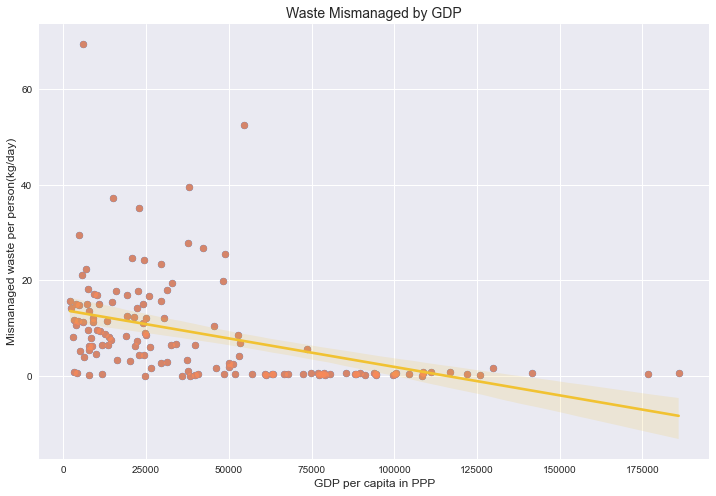

In [95]:
%matplotlib inline

plt.style.use('seaborn')
plt.figure(1, figsize=(12,8))

plt.scatter(plastic_waste['GDP per capita in PPP'], plastic_waste['Mismanaged waste per person(kg/day)'])
plt.title('Waste Mismanaged by GDP', loc='center', fontsize=14)
plt.ylabel('Mismanaged waste per person(kg/day)', loc='center', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)

sns.regplot(x='GDP per capita in PPP', y='Mismanaged waste per person(kg/day)', data=plastic_waste,
           scatter_kws={'color': '#F98A59'}, line_kws={'color': '#f1c232'})

plt.show()

Graph 2: Waste Generated & GDP

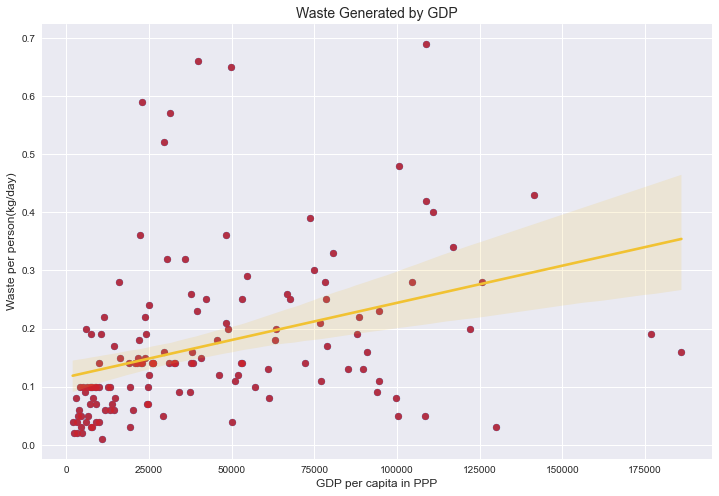

In [94]:
%matplotlib inline

plt.style.use('seaborn')
plt.figure(2, figsize=(12,8))

plt.scatter(plastic_waste['GDP per capita in PPP'], plastic_waste['Waste per person(kg/day)'])
plt.title('Waste Generated by GDP', loc='center', fontsize=14)
plt.ylabel('Waste per person(kg/day)', loc='center', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)

sns.regplot(x=plastic_waste['GDP per capita in PPP'], y=plastic_waste['Waste per person(kg/day)'],
           scatter_kws={'color': '#CD212A'}, line_kws={'color': '#f1c232'})

plt.show()

<h2>Conclusion:</h2>

From the graphs above we understand that: 
- Mismanaged waste <b><u>does not</u></b> increase with an increase in country's GDP per capita. 
- But Generated waste <b><u>increases</u></b> with increase in a country's GDP. </li><br>

Therefore, the trends and assumptions that were spotted on the crowd sourced GIS data is empirically and statistically significant. Even though countries with higher GDP per capita produces a lot of waste but they are also in a better position to manage and track what percentage of this waste gets missmanaged. On the contary, emerging economies that are in the business of trading plastic waste needs to ensure that system are in place to prevent the imported or generated waste from ending up in the oceans. 

Ultimately, tackling plastic pollution requires a multi-pronged approach. It needs to be tackled at 3 main levels
- At the source: Encourage and invest in companies trying to build more eco-friendly plastic or alternatives
- Limiting usage: Replacing single-use plastic packaging cannot happen overnight. Therefore, as an immediate countermeasure, limiting its use-cases whenever possible seems only realistic
- End-of-life: The only way to make the system circular is to ensure these plastic waste is being repurposed ethically and responsibly. For example: [Turning plastic waste into bricks](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjtv96D1pz5AhWUI0QIHctjDLsQwqsBegQIFhAB&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DxKTgMogqBxs&usg=AOvVaw2XWtht073UbJVz1_Cndh34) 

            